In [311]:
#Importing the Python libraries we will use : 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [94]:
#Importing the files to process: 

df = pd.read_csv('/Users/KevinS1/Desktop/Portfolio /Projet/Shopping trends/shopping_trends_updated.csv')

In [334]:
# 1- Display the first 10 rows of the dataset :

df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,More than 55 years old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-24 years old
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,25-55 years old
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-24 years old
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,25-55 years old
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,25-55 years old
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,More than 55 years old
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,25-55 years old
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,25-55 years old
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,More than 55 years old


In [17]:
# 2- Check dataset size :

num_rows, num_columns = df.shape

print("We have", num_rows, "rows and", num_columns, "columns.")

We have 3900 rows and 18 columns.


In [20]:
#3- Check the number of unique values in each column : 

df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [21]:
#4- Check the number of null values per column : 

df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [27]:
#5- Check for duplicates : 

df.duplicated().sum()

0

In [26]:
#6- Display dataset information : 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [97]:
#7- Changing the data type of the "Customer ID" column

df['Customer ID'] = df['Customer ID'].astype('object')

df['Customer ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3900 entries, 0 to 3899
Series name: Customer ID
Non-Null Count  Dtype 
--------------  ----- 
3900 non-null   object
dtypes: object(1)
memory usage: 30.6+ KB


In [32]:
#8- Descriptive statistics :

df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


In [336]:
#8- Create age groups to better exploit data Age :

def decoupage_age (liste_age):
    seuils = [18,25,55]
    groupes = ["18-24 years old", "25-55 years old", "More than 55 years old"]
    Tranches_Age = []
    
    for age in liste_age :
        if age > seuils[0] and age < seuils[1] :
            Tranches_Age.append(groupes[0])
        elif age > seuils[1] and age < seuils[2] :
            Tranches_Age.append(groupes[1])
        else : 
            Tranches_Age.append(groupes[2])
            
    return Tranches_Age


df['Age groups'] = decoupage_age(df['Age'])

df.head(10)

            
            
    

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,More than 55 years old
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-24 years old
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,25-55 years old
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-24 years old
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,25-55 years old
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly,25-55 years old
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly,More than 55 years old
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly,25-55 years old
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually,25-55 years old
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly,More than 55 years old


/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/1976179878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Location_s.index,x=Location_s.values,palette='viridis',ax=axes[0],orient='h')


/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/1976179878.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')
/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/1976179878.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha='center', fontsize=9)


Text(0.5, 1.0, 'Representation of Gender')

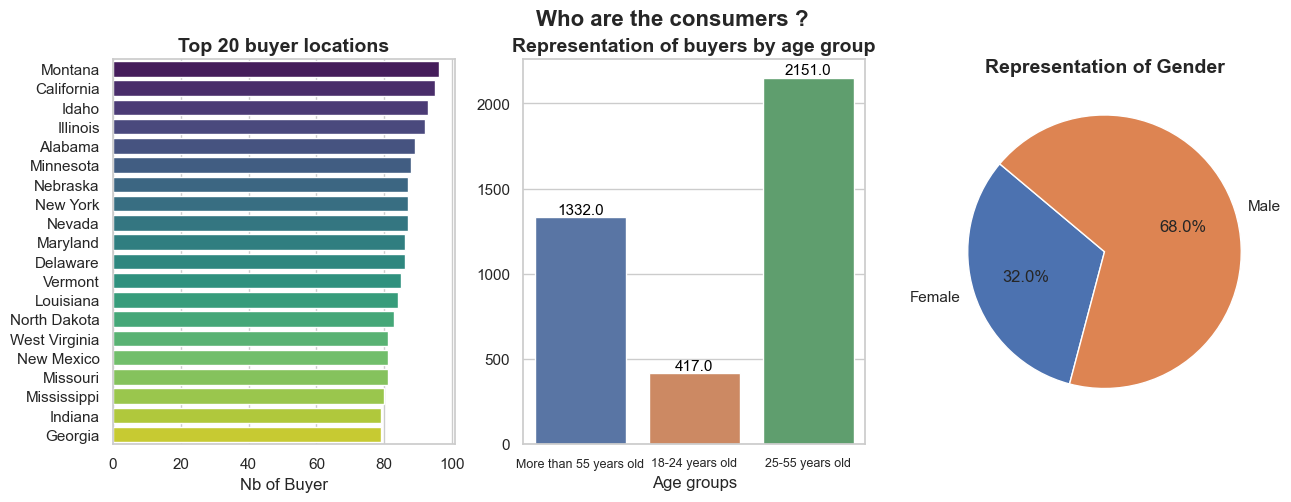

In [306]:
# I- Creating the Consumer Dashboard :

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Who are the consumers ? ', fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.4,wspace=0.2)

# a) 1st Dashboard chart - Top 20 buyer locations: 

Location_s= df['Location'].value_counts().sort_values(ascending=False)[:20]
sns.barplot(y=Location_s.index,x=Location_s.values,palette='viridis',ax=axes[0],orient='h')
axes[0].set_ylabel('')
axes[0].set_xlabel('Nb of Buyer')
axes[0].set_title('Top 20 buyer locations',fontsize=14,fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')

# b) 2nd Dashboard chart - Representation of buyers by age group :

ax =sns.countplot(data=df,x='Age groups',hue='Age groups',ax=axes[1])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
axes[1].set_title('Representation of buyers by age group',fontsize=14,fontweight='bold')
axes[1].set_ylabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0, ha='center', fontsize=9)

# c) 3rd Dashboard chart - Representation of Gender : 
# Group data for pie chart
grouped_data = df.groupby('Gender').size().reset_index(name='count')
axes[2].pie(grouped_data['count'], labels=grouped_data['Gender'], autopct='%1.1f%%', startangle=140)
axes[2].set_title('Representation of Gender',fontsize=14,fontweight='bold')


/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/2451072258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Season_s.index,y=Season_s.values,palette='viridis',ax=axes[0][0])
/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/2451072258.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=FP_s.index,x=FP_s.values,palette='viridis',ax=axes[0][1],orient='h')
/var/folders/r_/fh7_wvjx5t19x1_n697yrkl40000gp/T/ipykernel_82263/2451072258.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=0, ha='center', fontsiz

[Text(0, 0, 'Blouse'),
 Text(0, 1, 'Jewelry'),
 Text(0, 2, 'Pants'),
 Text(0, 3, 'Shirt'),
 Text(0, 4, 'Dress'),
 Text(0, 5, 'Sweater'),
 Text(0, 6, 'Jacket'),
 Text(0, 7, 'Belt'),
 Text(0, 8, 'Sunglasses'),
 Text(0, 9, 'Coat'),
 Text(0, 10, 'Sandals'),
 Text(0, 11, 'Socks'),
 Text(0, 12, 'Skirt'),
 Text(0, 13, 'Shorts'),
 Text(0, 14, 'Scarf'),
 Text(0, 15, 'Hat'),
 Text(0, 16, 'Handbag'),
 Text(0, 17, 'Hoodie'),
 Text(0, 18, 'Shoes'),
 Text(0, 19, 'T-shirt'),
 Text(0, 20, 'Sneakers'),
 Text(0, 21, 'Boots'),
 Text(0, 22, 'Backpack'),
 Text(0, 23, 'Gloves'),
 Text(0, 24, 'Jeans')]

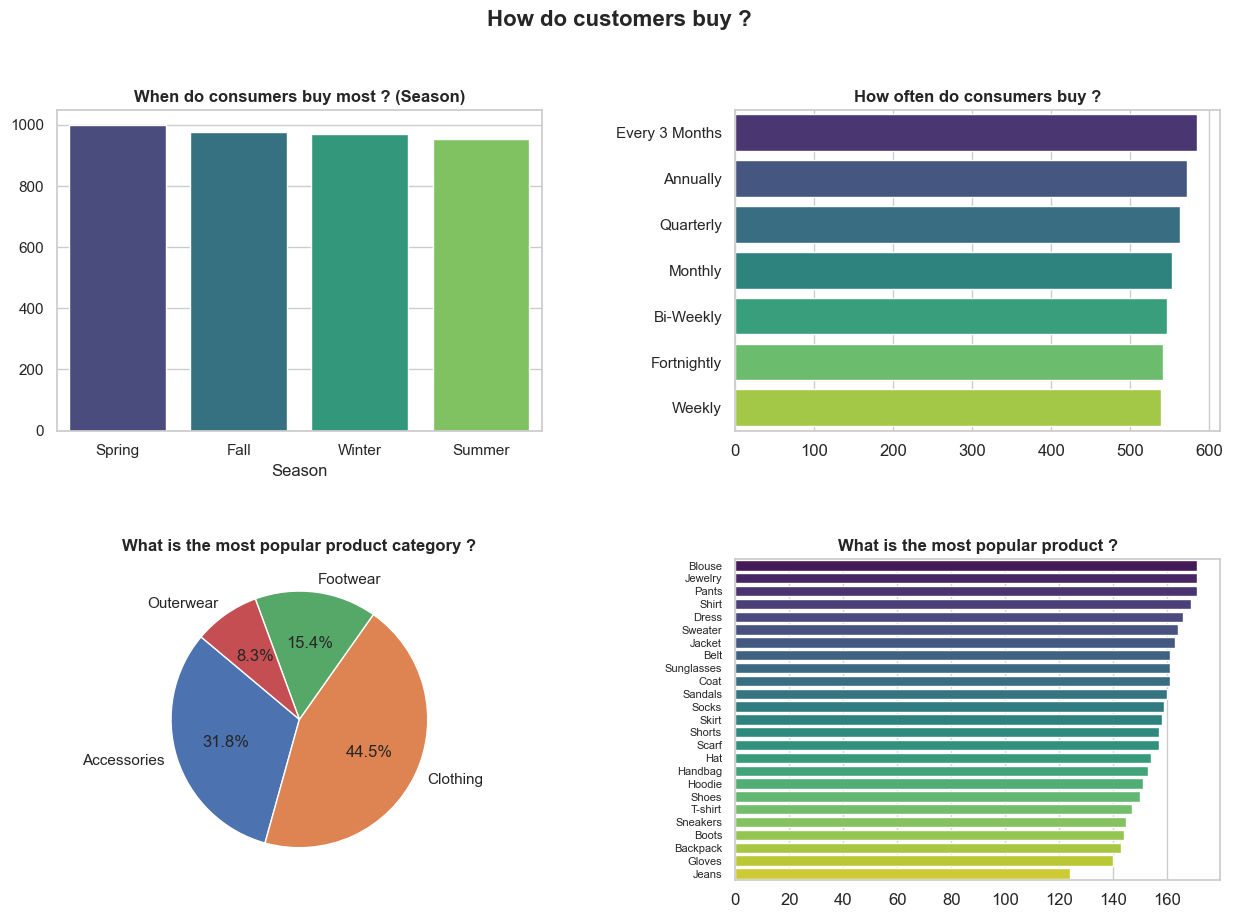

In [330]:
# II - Creating a consumer purchasing behavior dashboard

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
fig.suptitle('How do customers buy ?', fontsize=16, fontweight='bold')

# a) 1st Dashboard chart - When do consumers buy most? (Season) : 
Season_s= df['Season'].value_counts().sort_values(ascending=False)
sns.barplot(x=Season_s.index,y=Season_s.values,palette='viridis',ax=axes[0][0])
axes[0][0].set_xlabel('Season')
axes[0][0].set_title('When do consumers buy most ? (Season)',fontweight='bold')


# b) 2nd Dashboard chart - How often do consumers buy? 
FP_s= df['Frequency of Purchases'].value_counts().sort_values(ascending=False)
sns.barplot(y=FP_s.index,x=FP_s.values,palette='viridis',ax=axes[0][1],orient='h')
axes[0][1].set_title('How often do consumers buy ?',fontweight='bold')
axes[0][1].set_ylabel('')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=0, ha='center', fontsize=12)

# c) 3rd Dashboard chart - What is the most popular product category?
# Group data for pie chart
grouped_category = df.groupby('Category').size().reset_index(name='count')
axes[1][0].pie(grouped_category['count'], labels=grouped_category['Category'], autopct='%1.1f%%', startangle=140)
axes[1][0].set_title('What is the most popular product category ?',fontweight='bold')

# d) 4th Dashboard graphic - What is the most popular product? :
ITP_s= df['Item Purchased'].value_counts().sort_values(ascending=False)
sns.barplot(y=ITP_s.index,x=ITP_s.values,palette='viridis',orient='h',ax=axes[1][1])
axes[1][1].set_title('What is the most popular product ?',fontweight='bold')
axes[1][1].set_ylabel('')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=0, ha='center', fontsize=12)
axes[1][1].set_yticklabels(axes[1][1].get_yticklabels(), fontsize=8)
